In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print("Successful")
        break
    break

In [2]:
import numpy as np
import pandas as pd
import os
import glob
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/kaggle/input/ocular-disease-recognition-odir5k/full_df.csv")
df = df.drop_duplicates(subset = ['ID'])

In [4]:
# Crude estimation of findings ratio
findings = df.iloc[:, 7:15]
totals = findings.sum()
totals

N    1080
D    1105
G     206
C     208
A     163
H     103
M     171
O     905
dtype: int64

In [5]:
df

ID  Patient Age Patient Sex    Left-Fundus    Right-Fundus  \
0        0           69      Female     0_left.jpg     0_right.jpg   
1        1           57        Male     1_left.jpg     1_right.jpg   
2        2           42        Male     2_left.jpg     2_right.jpg   
3        4           53        Male     4_left.jpg     4_right.jpg   
4        5           50      Female     5_left.jpg     5_right.jpg   
...    ...          ...         ...            ...             ...   
6146  4394           56        Male  4394_left.jpg  4394_right.jpg   
6176  4427           43        Male  4427_left.jpg  4427_right.jpg   
6276  4551           53        Male  4551_left.jpg  4551_right.jpg   
6321  4601           36        Male  4601_left.jpg  4601_right.jpg   
6372  4659           42        Male  4659_left.jpg  4659_right.jpg   

                               Left-Diagnostic Keywords  \
0                                              cataract   
1                                         normal fundus   
2     laser spot，moderate non proliferative retinopathy   
3                           macular epiretinal membrane   
4                moderate non proliferative retinopathy   
...                                                 ...   
6146                  mild nonproliferative retinopathy   
6176                  mild nonproliferative retinopathy   
6276                  mild nonproliferative retinopathy   
6321             moderate non proliferative retinopathy   
6372                  mild nonproliferative retinopathy   

                   Right-Diagnostic Keywords  N  D  G  C  A  H  M  O  \
0                              normal fundus  0  0  0  1  0  0  0  0   
1                              normal fundus  1  0  0  0  0  0  0  0   
2     moderate non proliferative retinopathy  0  1  0  0  0  0  0  1   
3          mild nonproliferative retinopathy  0  1  0  0  0  0  0  1   
4     moderate non proliferative retinopathy  0  1  0  0  0  0  0  0   
...                                      ... .. .. .. .. .. .. .. ..   
6146                       low image quality  0  1  0  0  0  0  0  0   
6176                       low image quality  0  1  0  0  0  0  0  0   
6276  intraretinal microvascular abnormality  0  1  0  0  0  0  0  1   
6321                       low image quality  0  1  0  0  0  0  0  0   
6372  intraretinal microvascular abnormality  0  1  0  0  0  0  0  1   

                                               filepath labels  \
0     ../input/ocular-disease-recognition-odir5k/ODI...  ['N']   
1     ../input/ocular-disease-recognition-odir5k/ODI...  ['N']   
2     ../input/ocular-disease-recognition-odir5k/ODI...  ['D']   
3     ../input/ocular-disease-recognition-odir5k/ODI...  ['D']   
4     ../input/ocular-disease-recognition-odir5k/ODI...  ['D']   
...                                                 ...    ...   
6146  ../input/ocular-disease-recognition-odir5k/ODI...  ['D']   
6176  ../input/ocular-disease-recognition-odir5k/ODI...  ['D']   
6276  ../input/ocular-disease-recognition-odir5k/ODI...  ['D']   
6321  ../input/ocular-disease-recognition-odir5k/ODI...  ['D']   
6372  ../input/ocular-disease-recognition-odir5k/ODI...  ['D']   

                        target       filename  
0     [1, 0, 0, 0, 0, 0, 0, 0]    0_right.jpg  
1     [1, 0, 0, 0, 0, 0, 0, 0]    1_right.jpg  
2     [0, 1, 0, 0, 0, 0, 0, 0]    2_right.jpg  
3     [0, 1, 0, 0, 0, 0, 0, 0]    4_right.jpg  
4     [0, 1, 0, 0, 0, 0, 0, 0]    5_right.jpg  
...                        ...            ...  
6146  [0, 1, 0, 0, 0, 0, 0, 0]  4394_left.jpg  
6176  [0, 1, 0, 0, 0, 0, 0, 0]  4427_left.jpg  
6276  [0, 1, 0, 0, 0, 0, 0, 0]  4551_left.jpg  
6321  [0, 1, 0, 0, 0, 0, 0, 0]  4601_left.jpg  
6372  [0, 1, 0, 0, 0, 0, 0, 0]  4659_left.jpg  

[3358 rows x 19 columns]

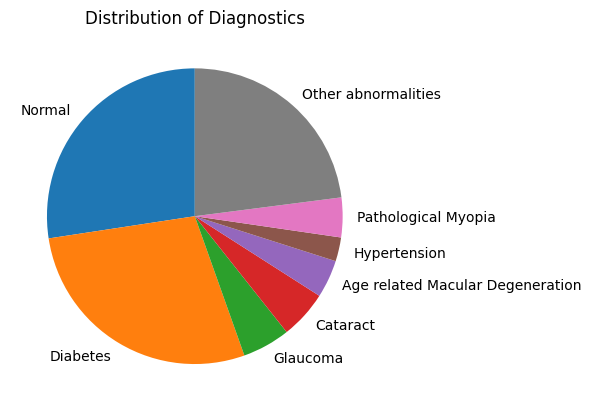

In [6]:
extended_labels = ['Normal', 'Diabetes', 'Glaucoma', 'Cataract', 'Age related Macular Degeneration', 'Hypertension', 'Pathological Myopia', 'Other abnormalities']
plt.pie(totals, labels=extended_labels, startangle=90)

plt.title("Distribution of Diagnostics")

plt.show()

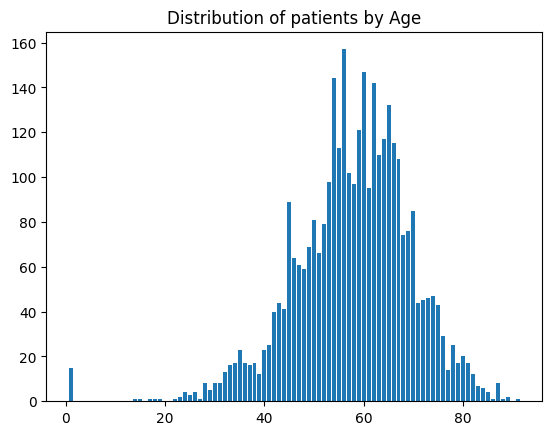

In [7]:
ages = df['Patient Age'].value_counts()
plt.bar(ages.index, ages)
plt.title("Distribution of patients by Age")
plt.show()

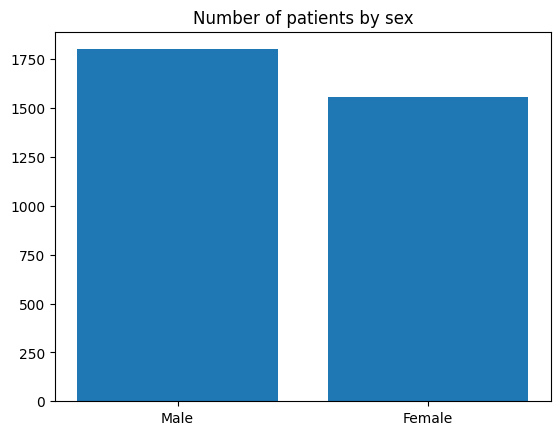

In [8]:
sex = df['Patient Sex'].value_counts()
plt.bar(sex.index, sex)
plt.title("Number of patients by sex")
plt.show()

# Image tagging


In [9]:
import pandas as pd
import numpy as np

import os
import shutil
import random

from sklearn.model_selection import train_test_split

import imageio
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv("/kaggle/input/ocular-disease-recognition-odir5k/full_df.csv")

In [11]:
df.head(5)

ID  Patient Age Patient Sex Left-Fundus Right-Fundus  \
0   0           69      Female  0_left.jpg  0_right.jpg   
1   1           57        Male  1_left.jpg  1_right.jpg   
2   2           42        Male  2_left.jpg  2_right.jpg   
3   4           53        Male  4_left.jpg  4_right.jpg   
4   5           50      Female  5_left.jpg  5_right.jpg   

                            Left-Diagnostic Keywords  \
0                                           cataract   
1                                      normal fundus   
2  laser spot，moderate non proliferative retinopathy   
3                        macular epiretinal membrane   
4             moderate non proliferative retinopathy   

                Right-Diagnostic Keywords  N  D  G  C  A  H  M  O  \
0                           normal fundus  0  0  0  1  0  0  0  0   
1                           normal fundus  1  0  0  0  0  0  0  0   
2  moderate non proliferative retinopathy  0  1  0  0  0  0  0  1   
3       mild nonproliferative retinopathy  0  1  0  0  0  0  0  1   
4  moderate non proliferative retinopathy  0  1  0  0  0  0  0  0   

                                            filepath labels  \
0  ../input/ocular-disease-recognition-odir5k/ODI...  ['N']   
1  ../input/ocular-disease-recognition-odir5k/ODI...  ['N']   
2  ../input/ocular-disease-recognition-odir5k/ODI...  ['D']   
3  ../input/ocular-disease-recognition-odir5k/ODI...  ['D']   
4  ../input/ocular-disease-recognition-odir5k/ODI...  ['D']   

                     target     filename  
0  [1, 0, 0, 0, 0, 0, 0, 0]  0_right.jpg  
1  [1, 0, 0, 0, 0, 0, 0, 0]  1_right.jpg  
2  [0, 1, 0, 0, 0, 0, 0, 0]  2_right.jpg  
3  [0, 1, 0, 0, 0, 0, 0, 0]  4_right.jpg  
4  [0, 1, 0, 0, 0, 0, 0, 0]  5_right.jpg

In [12]:
df[df['Left-Fundus'] == '0_left.jpg']

ID  Patient Age Patient Sex Left-Fundus Right-Fundus  \
0      0           69      Female  0_left.jpg  0_right.jpg   
3194   0           69      Female  0_left.jpg  0_right.jpg   

     Left-Diagnostic Keywords Right-Diagnostic Keywords  N  D  G  C  A  H  M  \
0                    cataract             normal fundus  0  0  0  1  0  0  0   
3194                 cataract             normal fundus  0  0  0  1  0  0  0   

      O                                           filepath labels  \
0     0  ../input/ocular-disease-recognition-odir5k/ODI...  ['N']   
3194  0  ../input/ocular-disease-recognition-odir5k/ODI...  ['C']   

                        target     filename  
0     [1, 0, 0, 0, 0, 0, 0, 0]  0_right.jpg  
3194  [0, 0, 0, 1, 0, 0, 0, 0]   0_left.jpg

In [13]:
# check if there are the same amount of images for left and right eyes
print("Number of labelled images for left eye: " + str(len(df[df['filename'].str.contains('left')])))
print("Number of labelled images for right eye: " + str(len(df[df['filename'].str.contains('right')])))

Number of labelled images for left eye: 3198
Number of labelled images for right eye: 3194


In [15]:
# select from original dataframe just filenames and labels columns
df_file_target = df[['filename', 'target']]

size = len(df_file_target)

# all the images filepaths in the dataset read from the main directory and read from the dataframe
filenames = os.listdir("/kaggle/input/ocular-disease-recognition-odir5k/preprocessed_images")
ls_df_files = df_file_target['filename'].to_list()

# check if there are images for all the labelled data in the dataframe by checking which rows are not in the image directory
# if this return 0 means that there are images for all the dataset rows
print("Mismatched files",str(len([ls_df_files[i] for i in ls_df_files if i not in filenames])))

# print also the size of the dataset
print("\nTotal images labelled: " + str(size))

Mismatched files 0

Total images labelled: 6392


In [16]:
df_distribution = df_file_target.groupby('target').count().sort_values('filename', ascending=False)
df_distribution = df_distribution.reset_index()
df_distribution['target'] = ['Normal (N)', 'Diabetes (D)', 'Other diseases/abnormalities (O)', 'Cataract (C)', 'Glaucoma (G)', 
                             'Age related Macular Degeneration (A)', 'Pathological Myopia (M)', 'Hypertension (H)']
df_distribution.rename(columns={'target':'Name of the disease', 'filename':'Number of images'}, inplace=True)

df_distribution['Percentage'] = round((df_distribution['Number of images'] / size) * 100, 2)

df_distribution

Name of the disease  Number of images  Percentage
0                            Normal (N)              2873       44.95
1                          Diabetes (D)              1608       25.16
2      Other diseases/abnormalities (O)               708       11.08
3                          Cataract (C)               293        4.58
4                          Glaucoma (G)               284        4.44
5  Age related Macular Degeneration (A)               266        4.16
6               Pathological Myopia (M)               232        3.63
7                      Hypertension (H)               128        2.00

In [17]:
# dictionary with category names and target vector
categories = {
    "N": "[1, 0, 0, 0, 0, 0, 0, 0]",
    "D": "[0, 1, 0, 0, 0, 0, 0, 0]",
    "G": "[0, 0, 1, 0, 0, 0, 0, 0]",
    "C": "[0, 0, 0, 1, 0, 0, 0, 0]",
    "A": "[0, 0, 0, 0, 1, 0, 0, 0]",
    "H": "[0, 0, 0, 0, 0, 1, 0, 0]",
    "M": "[0, 0, 0, 0, 0, 0, 1, 0]",
    "O": "[0, 0, 0, 0, 0, 0, 0, 1]",
}

if not os.path.exists('./labeled-images'): os.mkdir('./labeled-images') 

if not os.path.exists('./labeled-images/train/'): os.mkdir('./labeled-images/train/') 
if not os.path.exists('./labeled-images/test/'): os.mkdir('./labeled-images/test/')

train_df, test_df = train_test_split(df_file_target, test_size=0.1, random_state=432, shuffle=True, stratify=df['target'])

# This function given a directory path and a dataframe (train or test) creates one directory per label and move the images inside 
def make_labels_directories(parent_path, df):
    ls_len_df = []
    ls_len_directory = []

    for c in categories:
        # Create directory for each category
        path = os.path.join(parent_path, c)
        os.makedirs(path, exist_ok=True)

        # Filter DataFrame by target
        df_aux = df[df['target'] == categories[c]]

        # Define source directory
        path_src = "/kaggle/input/ocular-disease-recognition-odir5k/preprocessed_images"

        # Copy images to the new path
        for file in df_aux['filename']:
            src = os.path.join(path_src, file)
            dst = os.path.join(path, file)
            if os.path.exists(src):  # check if file exists
                shutil.copyfile(src, dst)
            else:
                print(f"File not found: {src}")

        ls_len_df.append(len(df_aux))
        ls_len_directory.append(len(os.listdir(path)))

    print("List of dataframe lengths per category:", ls_len_df)
    print("List of directory file counts per category:", ls_len_directory)


In [18]:
# create train directory with images inside (this command may take some time and required disk data access to move the files)
print("Creating train directory...")
make_labels_directories('/kaggle/working/labeled-images/train', train_df)

Creating train directory...
List of dataframe lengths per category: [2585, 1447, 256, 264, 239, 115, 209, 637]
List of directory file counts per category: [2585, 1447, 256, 264, 239, 115, 209, 637]


In [19]:
# create train directory with images inside (this command may take some time and required disk data access to move the files)
print("Creating test directory...")
make_labels_directories('/kaggle/working/labeled-images/test', test_df)

Creating test directory...
List of dataframe lengths per category: [288, 161, 28, 29, 27, 13, 23, 71]
List of directory file counts per category: [288, 161, 28, 29, 27, 13, 23, 71]


In [20]:
# Function that plots 9 images randomly taken from the each category directory
# the function takes as argument full category name (cat_name) and the label name (cat_label) 
# set path to read from train directory
import imageio.v2 as imageio

path = '/kaggle/working/labeled-images/train/'
def sample_plotting(cat_name, cat_label):
    images_filenames = os.listdir(path+cat_label)
    # randomly select a sample of 9 images from the directory
    sample = random.sample(images_filenames, 9)
    cat_path = path + cat_label + '/'
    print("Sample of " + cat_name + " (" + str(cat_label) + ") images:")
    f, ax = plt.subplots(3,3, figsize=(8,8))
    for i in range(len(sample)):
        path_image = cat_path + sample[i]
        img = imageio.imread(path_image)
        ax[i//3, i%3].imshow(img)
        ax[i//3, i%3].axis('off')
    plt.show()

Sample of Normal (N) images:


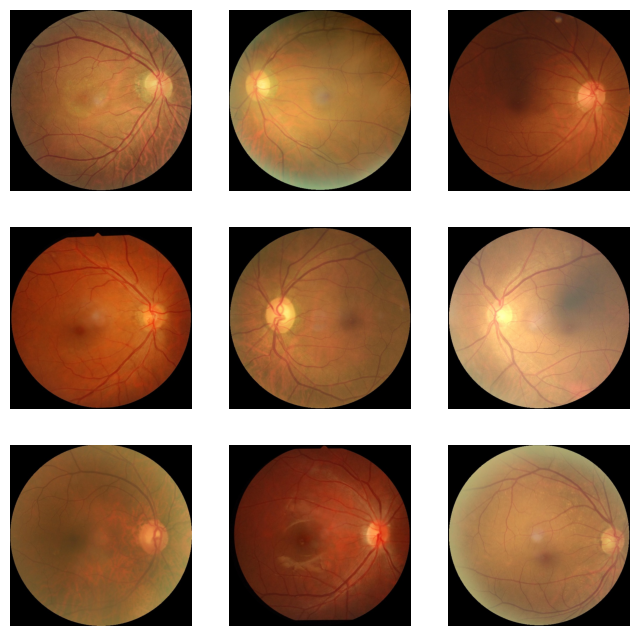

In [21]:
sample_plotting("Normal", "N")

Sample of Diabetes (D) images:


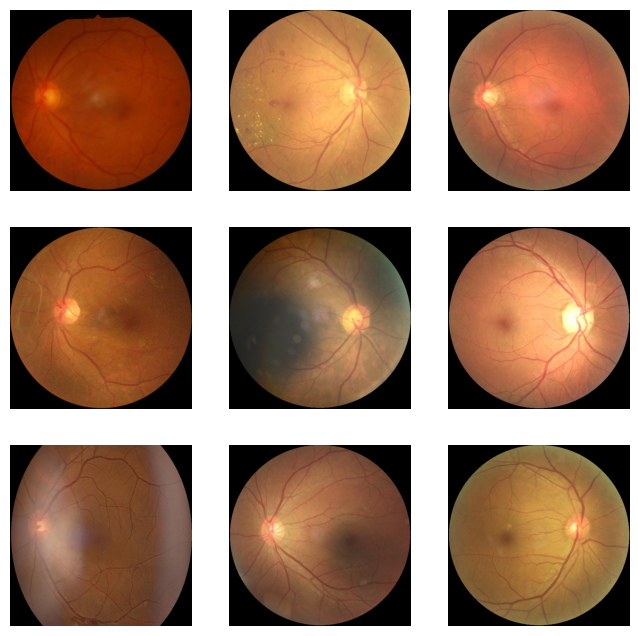

In [22]:
# sample plots for category: Diabetes (D)
sample_plotting("Diabetes", "D")

Sample of Other diseases/abnormalities (O) images:


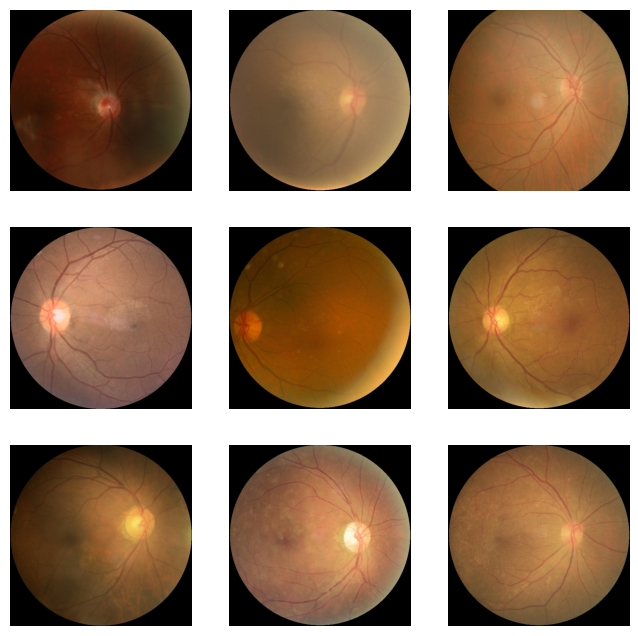

In [23]:
# sample plots for category: Other diseases/abnormalities (O)
sample_plotting("Other diseases/abnormalities", "O")

Sample of Cataract (C) images:


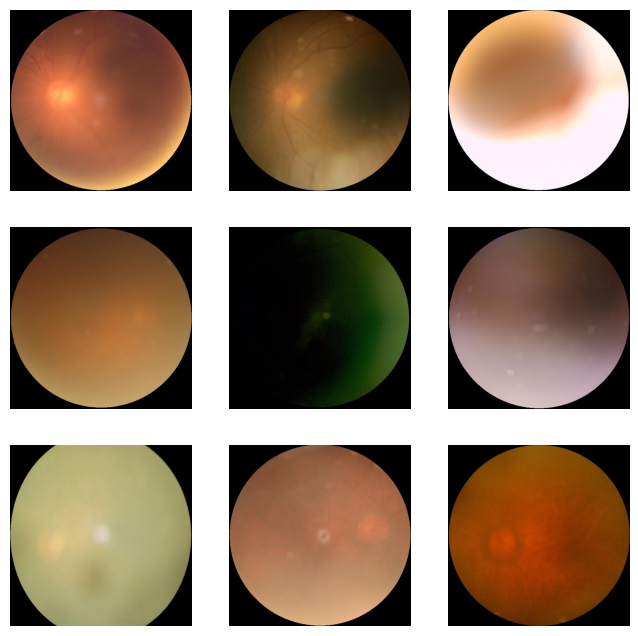

In [24]:
# sample plots for category: Cataract (C)
sample_plotting("Cataract", "C")

Sample of Glaucoma (G) images:


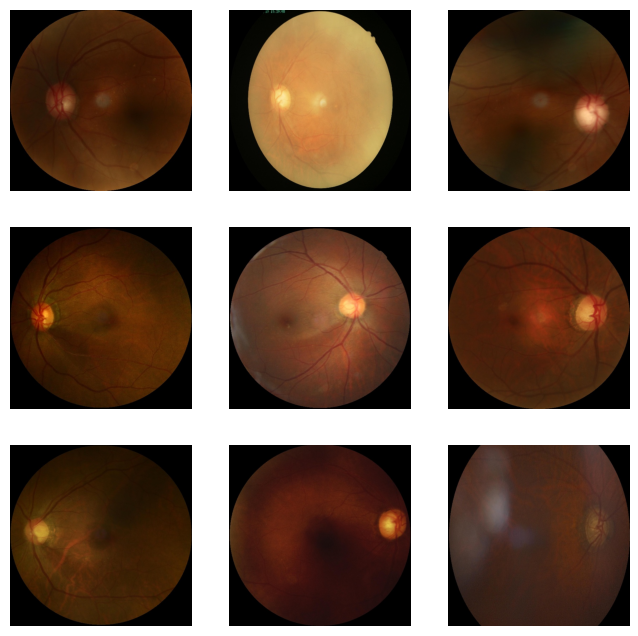

In [25]:
# sample plots for category: Glaucoma (G)
sample_plotting("Glaucoma", "G")

Sample of Age related Macular Degeneration (A) images:


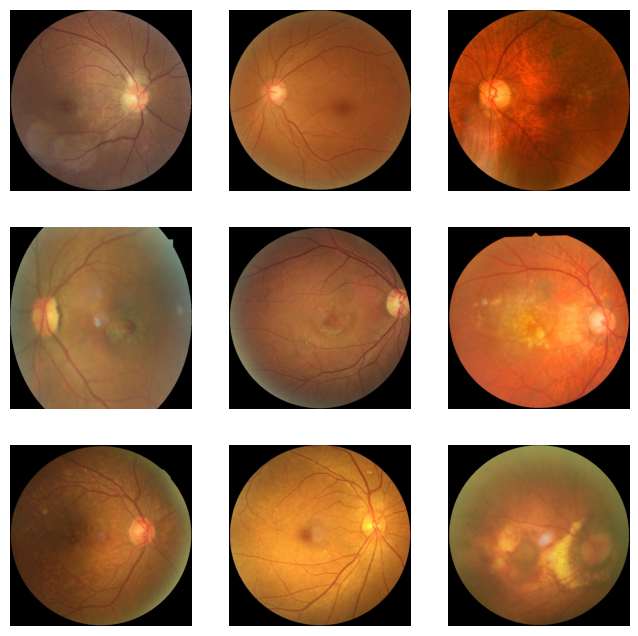

In [26]:
# sample plots for category: Age related Macular Degeneration (A)
sample_plotting("Age related Macular Degeneration", "A")

Sample of Pathological Myopia (M) images:


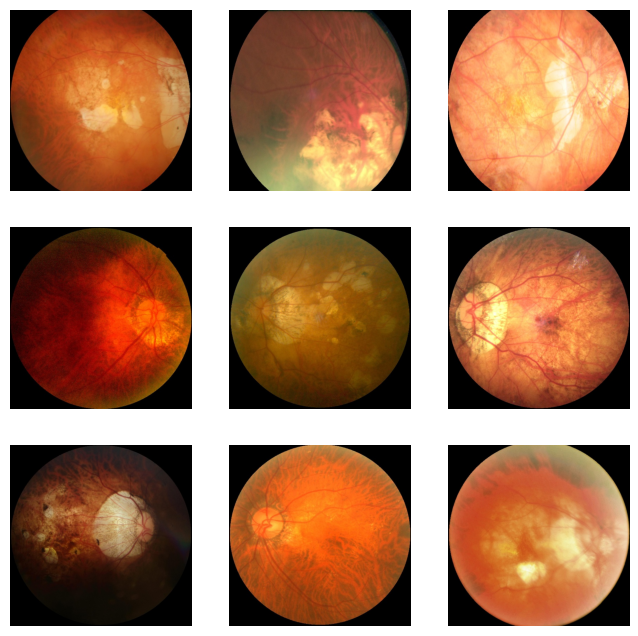

In [27]:
# sample plots for category: Pathological Myopia (M)
sample_plotting("Pathological Myopia", "M")

Sample of Hypertension (H) images:


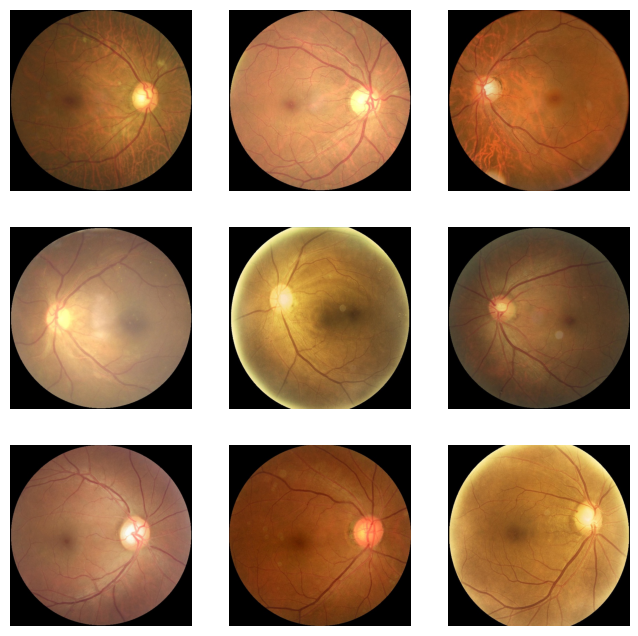

In [28]:
# sample plots for category: Hypertension (H)
sample_plotting("Hypertension", "H")

# Image Flipping

In [29]:
# import libraries
import os
import shutil

# to plot images
import imageio
import imageio.v2 as imageio
import matplotlib.pyplot as plt

# flipping process is done using cv2 library
import cv2

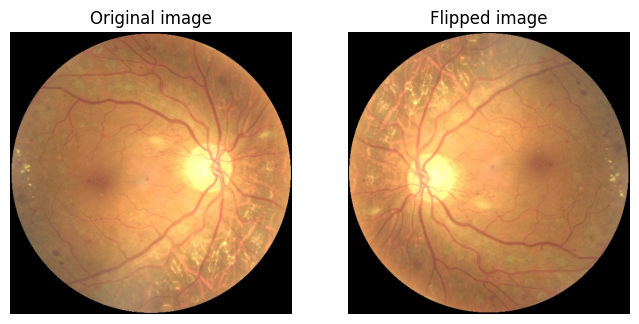

In [30]:
#/kaggle/working/labeled-images/train

sample_image = '/kaggle/working/labeled-images/train/D/50_right.jpg'

# read image
im = imageio.imread(sample_image)

# flip image
flipped_image = cv2.flip(im, -1)

# plot image
f, ax = plt.subplots(1,2, figsize=(8,8))  

ax[0].title.set_text("Original image")
ax[0].imshow(im)
ax[0].axis('off')

ax[1].title.set_text("Flipped image")
ax[1].imshow(flipped_image)
ax[1].axis('off')

plt.show()

In [32]:
'''
This function takes the actual dataset path and the new dataset path (train or test) and loop over the images,
applying the flip conversion to the right ones and moving the files to a new directory 
(right images are flipped and copied to the new directory and left images are just copied)
'''

def flip_images_to_directory(dataset_path, new_dataset_path):
    classes_path = [dataset_path + c for c in os.listdir(dataset_path)]
    for class_directory in classes_path:
        new_class_path = new_dataset_path + class_directory.split('/')[-1]
        if not os.path.exists(new_class_path): os.mkdir(new_class_path) 
        images_path = [class_directory+'/'+im for im in os.listdir(class_directory)]
        for im in images_path:
            aux = im.split('/')
            new_path = new_dataset_path + aux[-2] + '/' + aux[-1]
            if im[-9:] == 'right.jpg':
                image = cv2.imread(im)
                flipped_image = cv2.flip(image, -1)
                cv2.imwrite(new_path, flipped_image)
            else:
                shutil.copyfile(im, new_path)

In [ ]:

# actual dataset paths
train_path = "/kaggle/working/labeled-images/train/"
test_path = "/kaggle/working/labeled-images/test/"

# new dataset paths
new_train_path = "/kaggle/working/labeled-images-flipped/train/"
new_test_path = "/kaggle/working/labeled-images-flipped/test/"

# create new main directory if not exists
if not os.path.exists('/kaggle/working/labeled-images-flipped'): os.mkdir('/kaggle/working/labeled-images-flipped') 

# create new train and test directories under main directory
if not os.path.exists(new_train_path): os.mkdir(new_train_path) 
if not os.path.exists(new_test_path): os.mkdir(new_test_path)


# Call the function to apply the conversion and copy the files to new directories
# for the train set
print("Applying flipping process to the train set and moving files to the new directory...")
flip_images_to_directory(train_path, new_train_path)
print('Done!')

# for the test set
print("Applying flipping process to the test set and moving files to the new directory...")
flip_images_to_directory(test_path, new_test_path)
print('Done!')

print('Flipping process finished successfully!')

Applying flipping process to the train set and moving files to the new directory...
Done!
Applying flipping process to the test set and moving files to the new directory...
Done!
Flipping process finished successfully!


# VGG16 MODEL

In [34]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Rescaling, Activation, Dropout, Flatten, Dense, GlobalMaxPooling2D, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import VGG16

import os
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

2025-06-22 16:02:22.714226: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750608143.065106      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750608143.138102      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [35]:
train_dir = '/kaggle/working/labeled-images/train'
test_dir = '/kaggle/working/labeled-images/test'

BATCH_SIZE = 32
IMG_HEIGHT = 264
IMG_WIDTH = 264
EPOCHS = 100
#EPOCHS = 5

input_shape = (IMG_WIDTH, IMG_HEIGHT, 3)

In [36]:
training_generator = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='categorical',
    batch_size=BATCH_SIZE,
    image_size=(IMG_WIDTH, IMG_HEIGHT),
    shuffle=True,
    seed=432,
    validation_split=0.2,
    subset='training',
)

validation_generator = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='categorical',
    batch_size=BATCH_SIZE,
    image_size=(IMG_WIDTH, IMG_HEIGHT),
    shuffle=True,
    seed=432,
    validation_split=0.2,
    subset='validation',
)

test_generator = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='categorical',
    shuffle=False,
    batch_size=BATCH_SIZE,
    image_size=(IMG_WIDTH, IMG_HEIGHT),
    seed=432,
)

Found 5752 files belonging to 8 classes.
Using 4602 files for training.


I0000 00:00:1750608164.414231      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1750608164.415019      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Found 5752 files belonging to 8 classes.
Using 1150 files for validation.
Found 640 files belonging to 8 classes.


In [37]:
pretrained = VGG16(weights='imagenet', include_top=False)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [38]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Rescaling, Flatten, Dense, Activation

model = Sequential()

# Add input layer explicitly
model.add(Input(shape=input_shape))

# Add rescaling without input_shape
model.add(Rescaling(1./255))

model.add(pretrained)

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  
model.add(Dense(8))
model.add(Activation('softmax'))#multiclass

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 264, 264, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg16 (Functional)                   │ (None, 8, 8, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       8,388,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │           2,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 8)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,171,400 (88.39 MB)

 Trainable params: 23,171,400 (88.39 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
cat_list = os.listdir('/kaggle/working/labeled-images/train/')
cat_list.sort()

lenghts = [len(os.listdir('/kaggle/working/labeled-images/train/'+cat)) for cat in cat_list]
total_train_images = np.sum(lenghts)

weights = list(np.sqrt(np.round(1/(np.array(lenghts) / total_train_images),2)))

print(cat_list)
print(lenghts)
print(weights)

['A', 'C', 'D', 'G', 'H', 'M', 'N', 'O']
[239, 264, 1447, 256, 115, 209, 2585, 637]
[4.906118628814432, 4.6679760067935225, 1.9949937343260002, 4.740253157796532, 7.07248188403477, 5.2459508194416005, 1.493318452306808, 3.004995840263344]


In [40]:
patience = 20

#early_stopping = EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)
early_stopping = EarlyStopping(monitor='loss', patience=patience, restore_best_weights=True)

In [41]:
# freeze vgg16
pretrained.trainable = False

model.compile(loss='categorical_crossentropy',
            optimizer=Adam(learning_rate=0.001),
            metrics=['accuracy'])

In [43]:
len(training_generator)

144

In [44]:
# Training
history = model.fit(
    training_generator,
    steps_per_epoch=len(training_generator), # BATCH_SIZE
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=len(validation_generator), #BATCH_SIZE,
    verbose=1,
    callbacks = [early_stopping]
)
model.save('vgg16-100epoch-freeze.keras')

Epoch 1/100


I0000 00:00:1750608514.559658     117 service.cc:148] XLA service 0x7b9fcc01f600 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1750608514.564155     117 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1750608514.564248     117 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1750608515.153064     117 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-06-22 16:08:43.937777: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng12{k11=0} for conv (f32[32,128,132,132]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,128,132,132]{3,2,1,0}, f32[128,128,3,3]{3,2,1,0}, f32[128]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest

144/144 ━━━━━━━━━━━━━━━━━━━━ 115s 649ms/step - accuracy: 0.3623 - loss: 2.7093 - val_accuracy: 0.5017 - val_loss: 1.3459
Epoch 2/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 60s 414ms/step - accuracy: 0.4432 - loss: 1.4501 - val_accuracy: 0.5087 - val_loss: 1.2932
Epoch 3/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 60s 415ms/step - accuracy: 0.4599 - loss: 1.3853 - val_accuracy: 0.5217 - val_loss: 1.2727
Epoch 4/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 59s 411ms/step - accuracy: 0.5056 - loss: 1.3047 - val_accuracy: 0.5096 - val_loss: 1.2715
Epoch 5/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 60s 414ms/step - accuracy: 0.5102 - loss: 1.2837 - val_accuracy: 0.5148 - val_loss: 1.2863
Epoch 6/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 60s 417ms/step - accuracy: 0.5101 - loss: 1.2544 - val_accuracy: 0.5226 - val_loss: 1.2477
Epoch 7/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 60s 414ms/step - accuracy: 0.5303 - loss: 1.2089 - val_accuracy: 0.5330 - val_loss: 1.2370
Epoch 8/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 59s 413ms/step - accuracy: 0.5528 - loss: 1.15

In [45]:
model.save('eye.keras')

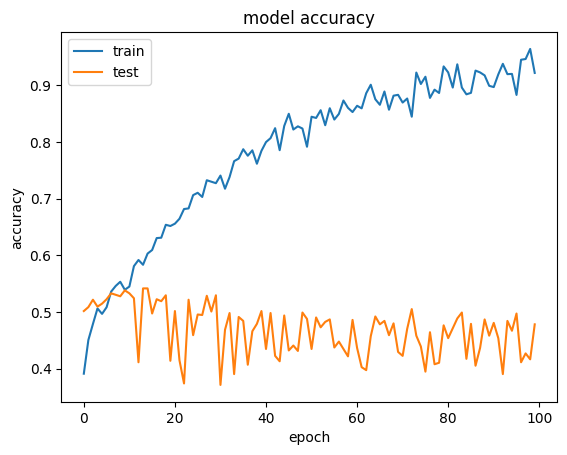

In [46]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

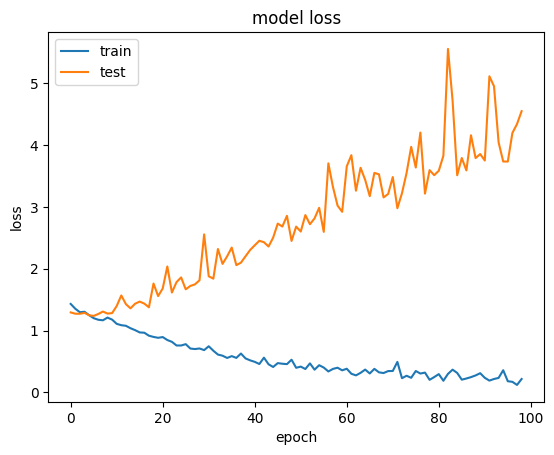

In [47]:
# summarize history for loss
plt.plot(history.history['loss'][1:])
plt.plot(history.history['val_loss'][1:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model = load_model('vgg16-100epoch-freeze.h5')

In [48]:
y_pred = model.predict(test_generator)

20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 289ms/step


In [49]:
test_labels = []
for image_batch, labels_batch in test_generator:
  for vector in labels_batch:
    test_labels.append(vector.numpy().astype(int))

y_real = np.array(test_labels)

In [50]:
y_pred_class = y_pred.argmax(axis=1)

In [54]:
y_pred_class

array([6, 7, 2, 0, 7, 0, 2, 0, 4, 7, 2, 2, 5, 6, 3, 2, 6, 7, 6, 6, 2, 7,
       2, 7, 6, 6, 7, 1, 1, 6, 1, 3, 1, 0, 1, 1, 1, 1, 7, 1, 1, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 4, 6, 1, 1, 7, 7, 0, 2, 2, 7, 7, 2, 7, 0,
       0, 7, 6, 7, 2, 6, 6, 6, 6, 2, 2, 2, 7, 7, 6, 2, 2, 2, 2, 2, 2, 7,
       2, 2, 7, 7, 6, 6, 6, 7, 6, 6, 6, 2, 7, 6, 6, 6, 6, 2, 2, 2, 7, 7,
       6, 7, 2, 6, 2, 2, 0, 7, 6, 6, 2, 2, 2, 7, 2, 6, 2, 2, 7, 7, 6, 6,
       2, 2, 6, 6, 6, 6, 6, 6, 2, 6, 2, 2, 7, 2, 7, 6, 2, 2, 2, 6, 2, 2,
       2, 6, 2, 2, 2, 6, 2, 6, 6, 6, 2, 2, 6, 2, 6, 6, 7, 6, 2, 6, 6, 2,
       6, 6, 6, 2, 2, 7, 7, 7, 7, 6, 2, 7, 6, 6, 2, 6, 6, 7, 2, 6, 2, 2,
       2, 2, 4, 6, 2, 6, 2, 2, 7, 0, 2, 2, 2, 6, 2, 2, 2, 6, 2, 3, 2, 6,
       7, 6, 2, 6, 6, 3, 7, 2, 0, 3, 3, 3, 7, 1, 6, 6, 6, 3, 6, 6, 1, 0,
       6, 6, 6, 2, 6, 7, 7, 7, 6, 7, 2, 2, 6, 7, 6, 4, 5, 0, 3, 6, 0, 5,
       5, 5, 5, 0, 5, 5, 5, 5, 0, 0, 0, 0, 5, 5, 5, 5, 5, 7, 2, 6, 6, 2,
       2, 6, 2, 2, 7, 2, 7, 6, 6, 6, 2, 6, 2, 2, 2,

In [51]:
y_real_class = y_real.argmax(axis=1)

Text(50.722222222222214, 0.5, 'Truth')

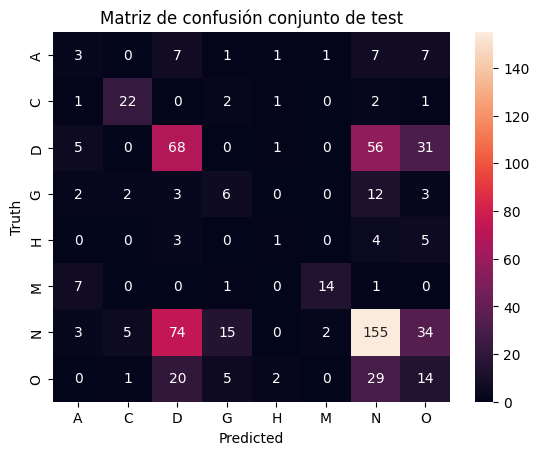

In [52]:
labels = ['A', 'C', 'D', 'G', 'H', 'M', 'N', 'O']

cf_matrix = confusion_matrix(y_real_class, y_pred_class)
sns.heatmap(cf_matrix, annot=True, xticklabels=labels, yticklabels=labels, fmt='d')
plt.title('Matriz de confusión conjunto de test')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [53]:
print(classification_report(y_real_class, y_pred_class, target_names=labels))

              precision    recall  f1-score   support

           A       0.14      0.11      0.12        27
           C       0.73      0.76      0.75        29
           D       0.39      0.42      0.40       161
           G       0.20      0.21      0.21        28
           H       0.17      0.08      0.11        13
           M       0.82      0.61      0.70        23
           N       0.58      0.54      0.56       288
           O       0.15      0.20      0.17        71

    accuracy                           0.44       640
   macro avg       0.40      0.37      0.38       640
weighted avg       0.46      0.44      0.45       640



In [57]:
training_generator.class_names

['A', 'C', 'D', 'G', 'H', 'M', 'N', 'O']